<a href="https://colab.research.google.com/github/HamidBekamiri/Econometrics-II/blob/main/04_R_M3_1_ann_intro_v5_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Understanding Artificial Neural Networks

The primary goal of this tutorial is to provide answers to the following questions:

> 1. **What is the structure of an Artificial Neural Network?**
2. **How to train an Artificial Neural Network?**
   - 2.1 How can we assess the performance of our model?
   - 2.2 What methods can we use to determine the optimal values for parameters like weights and biases?
   - 2.3 How feasible is it to find the best parameter values when dealing with a massive number of parameters, such as 10 million?
   - 2.4 Can you highlight the differences between Batch Gradient Descent and Stochastic Gradient Descent in the context of Machine Learning?
3. **Why do we need Deep Learning frameworks like Torch?**
   - 3.1 What is the procedure for constructing a Neural Network that encompasses various layers, including input, hidden, and output layers?
   - 3.2 What strategies can be employed to mitigate the issue of overfitting in a complex neural network?
   - 3.3 How to save and load a trained model using Torch?


Before we look at why neural networks work, it’s important to understand what neural networks do.

# 1. What is the structure of an Artificial Neural Network?

1. First, a weight is being applied to each input to an artificial neuron.
2. Second, the inputs are multiplied by their weights, and then a bias is applied to the outcome. This is called the weighted sum.
3. Third, the weighted sum is processed via an activation function, as a non-linear function.

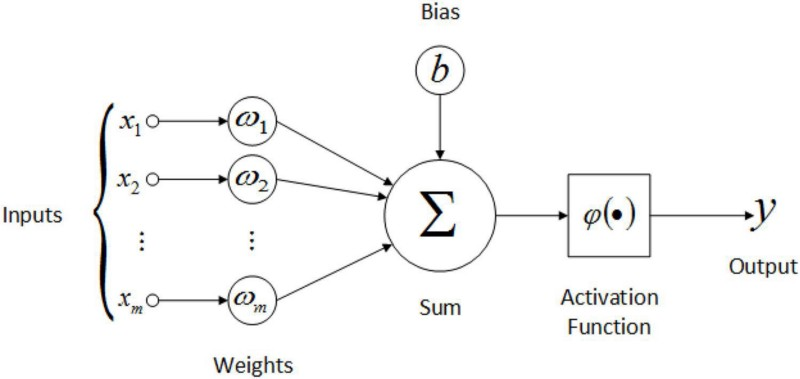

The neural network can compare the outputs of its nodes with the desired values using a property known as the delta rule, allowing the network to alter its weights through training to create more accurate output values. This training and learning procedure results in gradient descent.

The technique of updating weights in multi-layered perceptrons is virtually the same, however, the process is referred to as back-propagation. In such circumstances, the output values provided by the final layer are used to alter each hidden layer inside the network.

# 2. How to train an Artificial Neural Network?

In order to build a neural network, the following steps must be followed:

1. Creating a FeedForwardNetwork

```
- 1.1. Structure (Architecture) of NN
- 1.2. Loss Function
- 1.3. Optmization Approch
```

2. Forward Pass
3. FeedForward Evaluation
4. Backward Pass / Gradient Calculation
5. Back Propagation / Update Weights
6. Training Loop

In [ ]:
library(dplyr)  # Data manipulation
library(ggplot2)  # Plotting library


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




![Swedish Committee on Analysis of Risk Premium in Motor Insurance. read more]()

![Swedish Committee on Analysis of Risk Premium in Motor Insurance. read more](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Auto-Insurance.jpeg)

![]()

## Overview

In the dataset:

- \( X \) = number of claims
- \( Y \) = total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden

**Reference:** Swedish Committee on Analysis of Risk Premium in Motor Insurance


In [ ]:
# load dataset
data <- read.csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv')

In [ ]:
head(data)

,X,Y
,<int>,<dbl>
1,108,392.5
2,19,46.2
3,13,15.7
4,124,422.2
5,40,119.4
6,57,170.9


In [ ]:
library(scales)  # For rescaling functions
data_scaled <- as.data.frame(lapply(data, rescale))

In [ ]:
head(data_scaled)

,X,Y
,<dbl>,<dbl>
1,0.8709677,0.92965419
2,0.1532258,0.10942681
3,0.1048387,0.03718617
4,1.0000000,1.00000000
5,0.3225806,0.28280436
6,0.4596774,0.40478446


In [ ]:
# Define a simple linear model function
w = 1
nn <- function(x, w) {
  return(x * w)  # This is a simple linear model, not a neural network
}


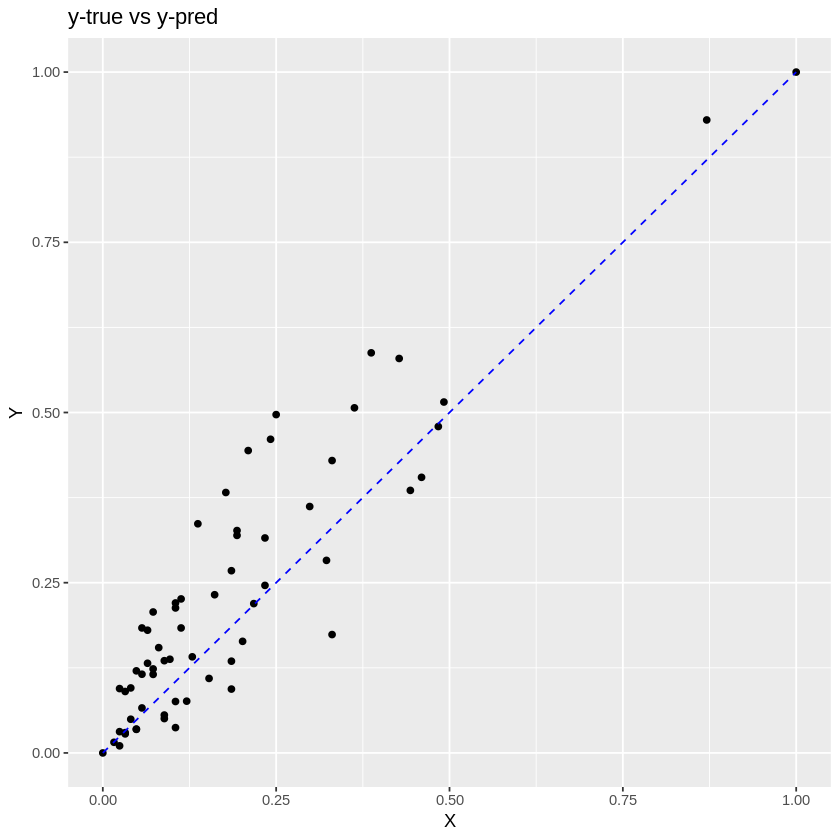

In [ ]:
# Plot data and the prediction line
plot_data_and_prediction <- function(data, nn_func, w) {
  # Add predicted values to the data
  data$Y_pred <- sapply(data$X, function(x) nn_func(x, w))

  # Create the plot
  ggplot(data, aes(x = X, y = Y)) +
    geom_point() +
    geom_line(aes(y = Y_pred), color = 'blue', linetype = 'dashed') +
    ggtitle('y-true vs y-pred') +
    xlab('X') +
    ylab('Y')
}

# Assuming data_scaled is already defined and contains columns X and Y
# Using the function to plot
plot_data_and_prediction(data_scaled, nn, 1)

# 2.1 How can we figure out how well our modeling is performing?
## Mean Squared Error (MSE)
### Definition

The Mean Squared Error (MSE) is a measure of the average of the squares of the "errors", that is, the difference between the true value and what is predicted (estimated). It's a popular metric for regression problems to evaluate the performance of a model.
### Formula
The formula for calculating MSE is given by:

$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$


- \( n \) is the number of data points or samples.
- \( $y_i$ \) is the actual value of the \( $i^{th}$ \) data point.
- \( $\hat{y}_i$) is the predicted value of the \( $i^{th}$ ) data point.

In [ ]:
# Define the output function y = x * w
nn <- function(x, w) {
  return(x * w)
}

# Define the loss function (mean squared error)
loss <- function(y_pred, y_true) {
  return(mean((y_pred - y_true)^2))
}

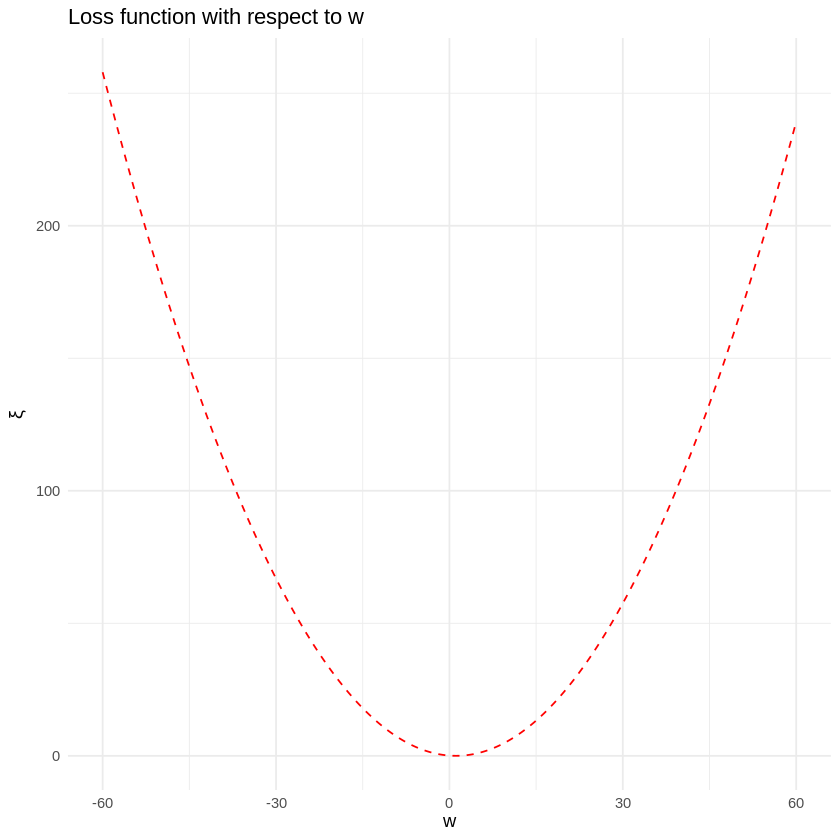

In [ ]:
# Required libraries
library(ggplot2)

# Function to plot loss vs. weight
plot_loss_vs_weight <- function(data, loss_function, nn_function) {
  # Generate a sequence of weights
  ws <- seq(-60, 60, length.out = 1000)

  # Calculate the loss for each weight
  loss_ws <- sapply(ws, function(w) loss_function(nn_function(data$X, w), data$Y))

  # Create a data frame for plotting
  plot_data <- data.frame(w = ws, loss = loss_ws)

  # Plot the loss function with respect to the weight
  ggplot(plot_data, aes(x = w, y = loss)) +
    geom_line(color = 'red', linetype = 'dashed') +
    labs(x = expression(w), y = expression(xi), title = 'Loss function with respect to w') +
    xlim(-60, 60) +
    theme_minimal()
}

# Function to plot loss vs. weight
loss_vs_weight <- function(data, loss_function, nn_function) {
  # Generate a sequence of weights
  ws <- seq(-60, 60, length.out = 1000)

  # Calculate the loss for each weight
  loss_ws <- sapply(ws, function(w) loss_function(nn_function(data$X, w), data$Y))

  # Return the loss values and corresponding weights
  return(list(loss_ws = loss_ws, ws = ws))
}



# Using the function to plot
plot_loss_vs_weight(data_scaled, loss, nn)

result <- loss_vs_weight(data_scaled, loss, nn)
loss_ws <- result$loss_ws
ws <- result$ws

# 2.2 How do we find out the optimal values for parameters (weights and biases)?

In [ ]:
# Find the minimum loss and its corresponding weight
min_loss <- min(loss_ws)
min_loss_index <- which.min(loss_ws)
min_loss_weight <- ws[min_loss_index]

# Display the results
min_loss
min_loss_weight

[1] 0.008160319

[1] 1.141141

Warning message in geom_point(aes(x = min_loss_w, y = min_loss), color = "blue", :
“Ignoring unknown parameters: `label`”
Warning message in geom_point(aes(x = min_loss_w, y = min_loss), color = "blue", :
“All aesthetics have length 1, but the data has 1000 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


[1] 0.008160319

[1] 1.141141

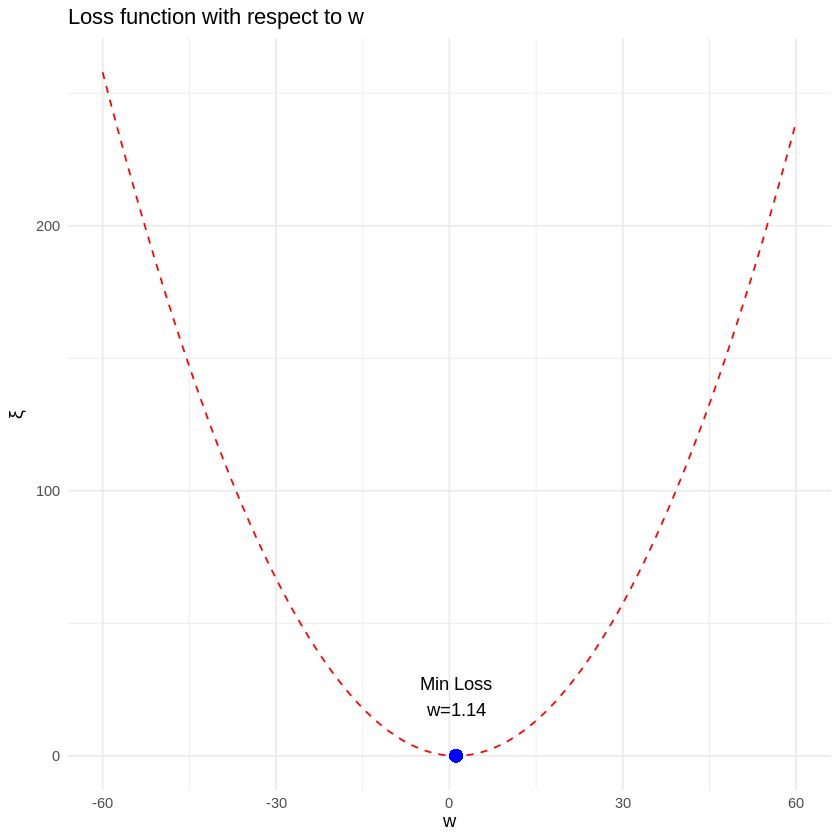

In [ ]:
# Required libraries
library(ggplot2)

# Function to calculate loss and corresponding values
calculate_loss_vs_weight <- function(data, loss_function, nn_function) {
  # Generate a sequence of weights
  ws <- seq(-60, 60, length.out = 1000)

  # Calculate the loss for each weight
  loss_ws <- sapply(ws, function(w) loss_function(nn_function(data$X, w), data$Y))

  # Find the minimum loss and corresponding weight
  min_loss <- min(loss_ws)
  min_loss_index <- which.min(loss_ws)
  min_loss_w <- ws[min_loss_index]

  # Return the loss values, corresponding weights, minimum loss, and the weight at minimum loss
  return(list(loss_ws = loss_ws, ws = ws, min_loss = min_loss, min_loss_w = min_loss_w))
}

# Function to plot loss vs. weight
plot_loss_vs_weight <- function(loss_ws, ws, min_loss, min_loss_w) {
  # Create a data frame for plotting
  plot_data <- data.frame(w = ws, loss = loss_ws)

  # Plot the loss function with respect to the weight and mark the minimum loss
  ggplot(plot_data, aes(x = w, y = loss)) +
    geom_line(color = 'red', linetype = 'dashed') +
    geom_point(aes(x = min_loss_w, y = min_loss), color = 'blue', size = 3, label = 'min loss') +
    labs(x = expression(w), y = expression(xi), title = 'Loss function with respect to w') +
    xlim(-60, 60) +
    theme_minimal() +
    annotate("text", x = min_loss_w, y = min_loss, label = sprintf("Min Loss\nw=%.2f", min_loss_w), vjust = -1)
}

# Calculate the loss and related values
result <- calculate_loss_vs_weight(data_scaled, loss, nn)

# Extract the results
loss_ws <- result$loss_ws
ws <- result$ws
min_loss <- result$min_loss
min_loss_w <- result$min_loss_w

# Plot the loss function with the minimum loss highlighted
plot_loss_vs_weight(loss_ws, ws, min_loss, min_loss_w)

# Return the minimum loss and corresponding weight
min_loss
min_loss_w


# Exercise 1

**Explore the linear modeling of data based on different values for w, such as 10, 5, 2, and 1, to find the minimum value of the loss function!**

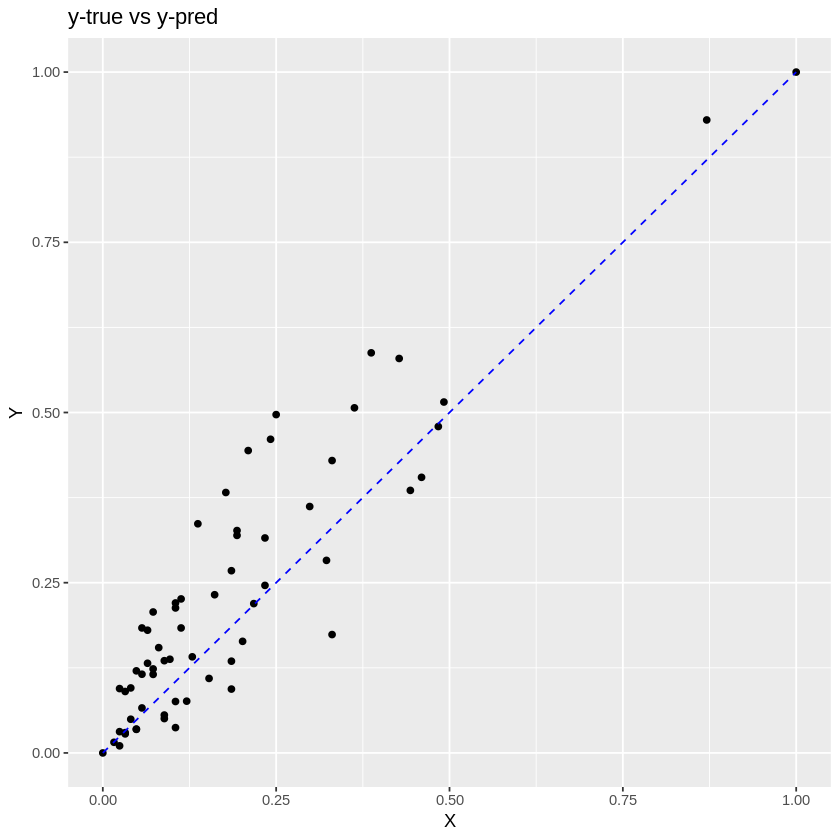

In [ ]:
# Define a weight value
w <- 1

# Assuming the function `plot_data_and_prediction` is already defined as in previous examples
# Using the provided function to plot
plot_data_and_prediction(data_scaled, nn, w)

# 2.3 Is it still easy to find the best value when we have, say, 10M parameters?

Finding optimal values for a vast number of parameters by exploring all possible combinations is an impractical approach. In other words, trying to find the best settings by looking at every possible option when you have millions of dials to adjust would take an impossible amount of time and computer power. It’s like trying to find a needle in a haystack, except the haystack is as big as a planet.

Here where is Mathematics (Gradient) comes into play!

The main idea behind the gradient of a function is that a function can have critical points where the gradient becomes zero. At these points, the function can have a minimum, maximum, or saddle (minimax) point. By selecting an initial value for a parameter like 'w' and considering the value and direction of the gradient, we can determine how to adjust the parameter value to find these critical points. This process is often referred to as 'descent,' especially when the goal is to find the minimum, as it involves moving in the direction that reduces the function's value. This reduction is typically achieved by subtracting a fraction of the gradient from the parameters.

The derivative of a function at a point shows the slope of the function at that point, and the gradient is an extension of the derivative for functions with more than one variable.

**In simpler terms, Gradient represents the slope of the function at a particular point.**

![image.png](https://i.stack.imgur.com/L1V3Y.png)

In [ ]:
install.packages('viridis')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [ ]:
# Required libraries
library(ggplot2)
library(viridis)  # For the color palette

# Function to calculate loss, gradients, and corresponding weights
calculate_loss_and_gradients <- function(data, loss_function, nn_function, num_points = 6) {
  # Generate a sequence of weights
  ws <- seq(-60, 60, length.out = 1000)

  # Calculate the loss for each weight
  loss_ws <- sapply(ws, function(w) loss_function(nn_function(data$X, w), data$Y))

  # Function to approximate the derivative (slope) at a given point
  derivative_at_point <- function(w_index) {
    h <- 1e-5  # Small step for numerical derivative
    w <- ws[w_index]
    loss_w_plus_h <- loss_function(nn_function(data$X, w + h), data$Y)
    loss_w <- loss_ws[w_index]
    return((loss_w_plus_h - loss_w) / h)
  }

  # Select points for gradient
  selected_indices <- round(seq(1, length(ws), length.out = num_points))
  slopes <- sapply(selected_indices, derivative_at_point)

  # Return the calculated values
  return(list(ws = ws, loss_ws = loss_ws, selected_indices = selected_indices, slopes = slopes, num_points = num_points))
}

# Function to plot loss function with gradients
plot_loss_with_gradients <- function(ws, loss_ws, selected_indices, slopes, num_points) {
  # Create a data frame for plotting
  plot_data <- data.frame(w = ws, loss = loss_ws)

  # Plot the loss function
  p <- ggplot(plot_data, aes(x = w, y = loss)) +
    geom_line(color = 'red', linetype = 'dashed') +
    labs(x = expression(w), y = expression(xi), title = 'Loss function with respect to w with Gradients and Slope Values') +
    xlim(-60, 60) +
    theme_minimal()

  # Add gradients and slope values
  colors <- viridis(num_points)
  for (i in seq_along(selected_indices)) {
    index <- selected_indices[i]
    w <- ws[index]
    loss_w <- loss_ws[index]
    slope <- slopes[i]

    # Calculate the tangent line
    line_length <- 10
    tangent_x <- c(w - line_length / 2, w + line_length / 2)
    tangent_y <- slope * (tangent_x - w) + loss_w

    # Add the tangent line and point to the plot
    p <- p +
      geom_line(data = data.frame(x = tangent_x, y = tangent_y), aes(x = x, y = y), color = colors[i], size = 1.5) +
      geom_point(aes(x = w, y = loss_w), color = colors[i], size = 3) +
      annotate("text", x = w, y = loss_w, label = sprintf("Slope: %.2f", slope), color = colors[i], vjust = -1, size = 3)
  }

  # Display the plot
  print(p)
}


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


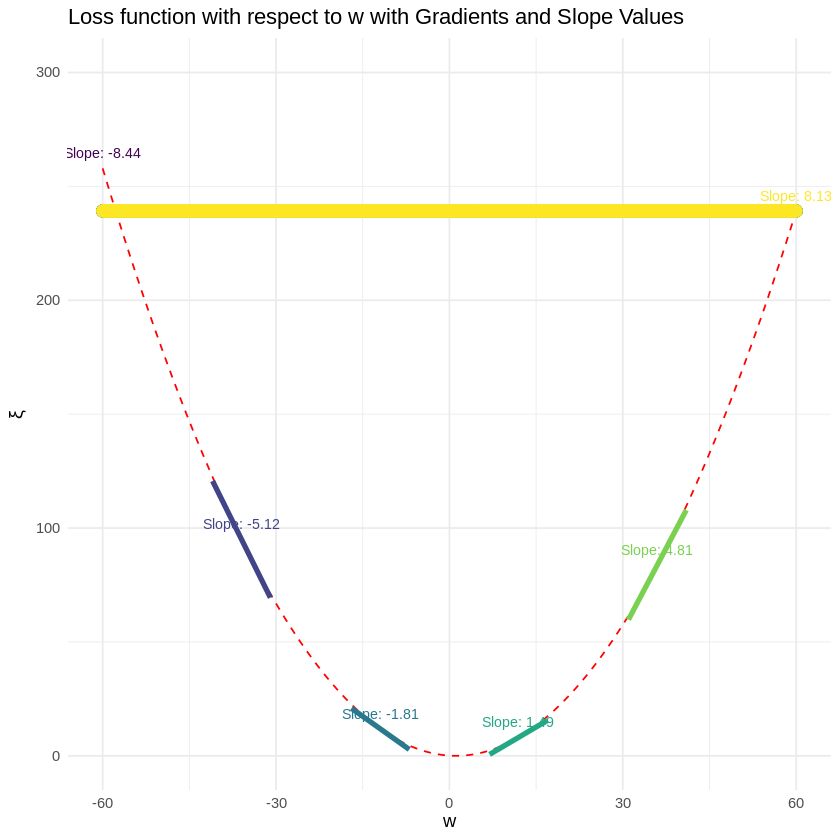

In [ ]:
# Usage example (assuming data_s, loss, and nn are defined)
result <- calculate_loss_and_gradients(data_scaled, loss, nn)
plot_loss_with_gradients(result$ws, result$loss_ws, result$selected_indices, result$slopes, result$num_points)

## Gradient of the MSE with respect to the weight (𝑤)

Mean Squared Error (MSE) Loss Function:

$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

Also we know that:

$y_i = w_ix_i$

### **Backward Pass / Gradient Calculation**




For a linear regression model with $( y_i = w_ix_i )$, the gradient of the MSE with respect to the weight $( w )$ is:

$\frac{\partial L}{\partial w} = \frac{2}{N} \sum_{i=1}^{N} x_i(y_i - t_i)$




### Explanation:

1. The derivative of $(y_i - t_i)^2$ with respect to $( y_i )$ is $2(y_i - t_i)$.
2. For $( y_i = w_ix_i )$, the derivative of $( y_i )$ with respect to $( w_i )$ is $( x_i )$.
3. Using the chain rule, the derivative of the loss with respect to $( w_i )$ is $( 2(y_i - t_i) \times x_i )$.
4. Averaging over all data points gives the gradient:
$\frac{\partial L}{\partial w} = \frac{2}{N} \sum_{i=1}^{N} x_i(y_i - t_i)$

This gradient provides direction and magnitude to adjust \( w \) to minimize the loss during gradient descent.


**Chain Rule**

Chain Rule for Derivatives:

$df(g(x))/dx = f'(g(x))g'(x)$

Used when a function is composed of another function.

### **Back Propagation / Update Weights**

The gradient descent formula is used to update the parameters of a model in order to minimize a cost or loss function. It's an iterative process that adjusts the parameters in the direction that reduces the cost function. The formula is as follows:

$ w_{\text{new}} = w_{\text{old}} - \alpha \cdot \nabla J(w_{\text{old}})$

Where:
- $( w_{\text{new}})$ is the updated parameter vector.
- $( w_{\text{old}})$ is the current parameter vector.
- $( \alpha)$ is the learning rate, determining the step size in each iteration.
- $\nabla J(w_{\text{old}})$ is the gradient of the cost or loss function \( L \) with respect to the parameters $w$ at the current values $w_{\text{old}}$.

This formula is used iteratively until convergence to find the parameter values that minimize the cost function.


# 2.4 Understanding the Differences Between Batch Gradient Descent and Stochastic Gradient Descent in Machine Learning

There are three main types of gradient descent:
> - **Batch Gradient Descent:** Batch Gradient Descent computes the gradient of the cost function with respect to the parameters for the entire training dataset. Computationally efficient when the dataset fits in memory because it can benefit from vectorized operations. Can be very slow for large datasets
- **Stochastic Gradient Descent:** Stochastic Gradient Descent (SGD) computes the gradient and updates the parameters for each training example one at a time. Can handle large datasets since it only requires one training example in memory at a time. Less accurate convergence. The path to the minimum is noisy compared to Batch Gradient Descent.
- **Mini-Batch Gradient Descent:** Mini-Batch Gradient Descent computes the gradient of the cost function and updates the parameters using a subset of the training data, rather than the entire dataset or a single training example. Faster computation than Batch Gradient Descent, as it doesn't need to process the entire dataset before making updates. The mini-batch size is an additional hyperparameter to tune, and finding the optimal size can be challenging.

Here, I'll explain Batch Gradient Descent and Stochastic Gradient Descent in a simple and clear manner.

### Batch Gradient Descent

In [ ]:
# Initializing Hyperparameters
epochs <- 5
learning_rate <- 2

# Initializing Parameters
w <- 50

# 1. Creating a Neural Network
# 1.1 Structure (Architecture) of NN
nn <- function(x, w) {
  # Output function y = x * w
  return(x * w)
}

# 1.2 Loss Function
loss <- function(y, t) {
  # Calculate the Mean Squared Error
  return(mean((t - y)^2))
}

# 1.3 Optimization Approach
gradient <- function(w, x, t) {
  # Compute the gradient
  y <- x * w
  return(mean(2 * x * (y - t)))
}

delta_w <- function(w_i, x, t, learning_rate) {
  # Compute the weight update
  return(learning_rate * gradient(w_i, x, t))
}

# Store weight history
w_his <- c()
w_his <- append(w_his, w)

# Loop over the number of epochs
for (i in 1:epochs) {

  # 2. Forward Pass
  output <- nn(data_scaled$X, w)

  # 3. FeedForward Evaluation
  loss_val <- loss(output, data_scaled$Y)

  # 4. Backward Pass / Gradient Calculation
  grad_value <- gradient(w, data_scaled$X, data_scaled$Y)  # Compute gradient
  dw <- delta_w(w, data_scaled$X, data_scaled$Y, learning_rate)

  # 5. Back Propagation / Update Weights
  w <- w - dw
  w_his <- append(w_his, w)

  # Print gradient, dw, weight, and loss values in a single line
  cat(sprintf("Iteration %d: Gradient = %.4f, Δw = %.4f, w(%d): %.4f, loss: %.4f\n",
              i, grad_value, dw, i, w, loss_val))
}

Iteration 1: Gradient = 6.7463, Δw = 13.4926, w(1): 36.5074, loss: 164.8565
Iteration 2: Gradient = 4.8837, Δw = 9.7675, w(2): 26.7399, loss: 86.3965
Iteration 3: Gradient = 3.5354, Δw = 7.0708, w(3): 19.6691, loss: 45.2797
Iteration 4: Gradient = 2.5593, Δw = 5.1186, w(4): 14.5505, loss: 23.7326
Iteration 5: Gradient = 1.8527, Δw = 3.7054, w(5): 10.8451, loss: 12.4409


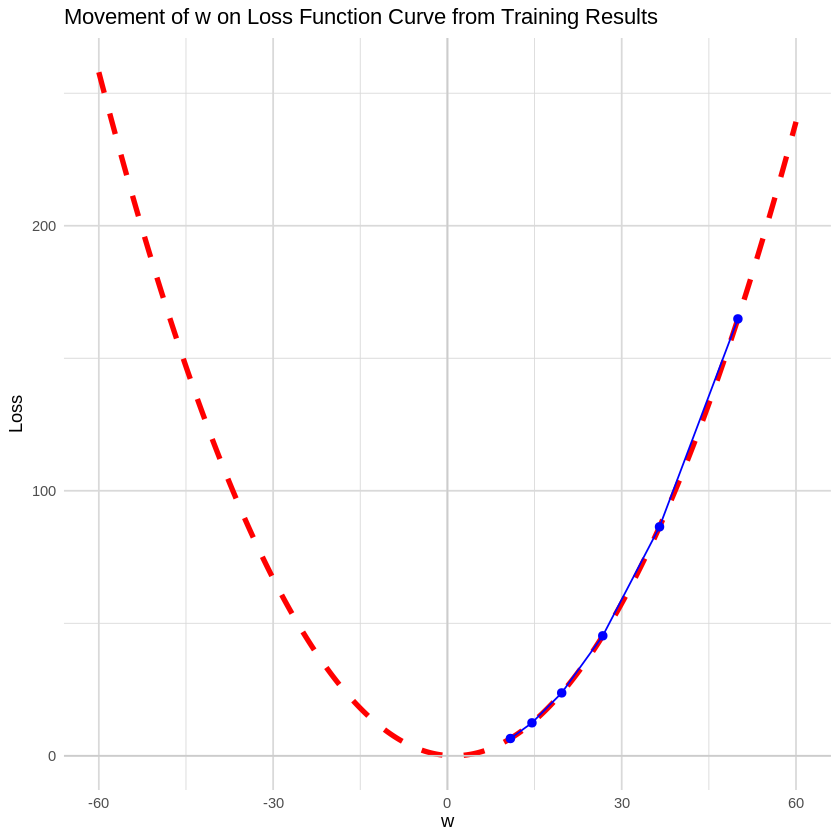

In [ ]:
# Required libraries
library(ggplot2)

# Assuming ws and loss_ws were previously calculated and w_his was generated from the training loop

# Create a data frame for the loss function curve
loss_data <- data.frame(w = ws, loss = loss_ws)

# Interpolate the loss values corresponding to the w_his values
w_his_loss <- approx(ws, loss_ws, w_his)$y

# Create a data frame for the training history
training_data <- data.frame(w = w_his, loss = w_his_loss)

# Plot the loss function curve and the training w values
ggplot() +
  geom_line(data = loss_data, aes(x = w, y = loss), color = 'red', linetype = 'dashed', size = 1.5) +
  geom_point(data = training_data, aes(x = w, y = loss), color = 'blue', size = 2) +
  geom_line(data = training_data, aes(x = w, y = loss), color = 'blue', linetype = 'solid', size = 0.5) +
  labs(title = 'Movement of w on Loss Function Curve from Training Results',
       x = expression(w), y = 'Loss') +
  xlim(-60, 60) +
  theme_minimal() +
  theme(panel.grid = element_line(color = "grey85")) +
  geom_vline(xintercept = 0, color = "grey80") +
  geom_hline(yintercept = 0, color = "grey80")

### Stochastic Gradient Descent

In [ ]:
# Initializing Hyperparameters
epochs <- 1
learning_rate <- 2

# Initializing Parameters
w <- 10

# 1. Creating a Neural Network
# 1.1 Structure (Architecture) of NN
nn <- function(x, w) {
  # Output function y = x * w
  return(x * w)
}

# 1.2 Loss Function
loss <- function(y, t) {
  # Calculate the Mean Squared Error
  return(mean((t - y)^2))
}

# 1.3 Optimization Approach
gradient <- function(w, x, t) {
  # Compute the gradient
  y <- x * w
  return(mean(2 * x * (y - t)))
}

delta_w <- function(w_i, x, t, learning_rate) {
  # Compute the weight update
  return(learning_rate * gradient(w_i, x, t))
}

# Store weight history
w_his <- c(w)

# Loop over the number of epochs
for (epoch in 1:epochs) {
  total_loss <- 0

  for (i in 1:length(data_scaled$X)) {
    x_i <- data_scaled$X[i]
    t_i <- data_scaled$Y[i]

    # 2. Forward Pass
    output <- nn(x_i, w)

    # 3. FeedForward Evaluation
    loss_val <- loss(output, t_i)

    # 4. Backward Pass / Gradient Calculation
    grad_value <- gradient(w, x_i, t_i)  # Compute gradient
    dw <- delta_w(w, x_i, t_i, learning_rate)

    # 5. Back Propagation / Update Weights
    w <- w - dw

    # Store updated weight
    w_his <- c(w_his, w)

    # Accumulate loss
    total_loss <- total_loss + loss_val

    # Print gradient, dw, weight, and loss values in a single line
    cat(sprintf("Epoch %d, Sample %d: Gradient = %.4f, Δw = %.4f, w: %.4f, loss: %.4f\n",
                epoch, i, grad_value, dw, w, loss_val))
  }

  # Print average loss for the epoch
  avg_loss <- total_loss / length(data_scaled$X)
  cat(sprintf("Epoch %d: Average Loss = %.4f\n\n", epoch, avg_loss))
}

Epoch 1, Sample 1: Gradient = 13.5523, Δw = 27.1046, w: -17.1046, loss: 60.5288
Epoch 1, Sample 2: Gradient = -0.8367, Δw = -1.6734, w: -15.4312, loss: 7.4545
Epoch 1, Sample 3: Gradient = -0.3470, Δw = -0.6940, w: -14.7372, loss: 2.7389
Epoch 1, Sample 4: Gradient = -31.4743, Δw = -62.9487, w: 48.2115, loss: 247.6586
Epoch 1, Sample 5: Gradient = 9.8512, Δw = 19.7023, w: 28.5092, loss: 233.1514
Epoch 1, Sample 6: Gradient = 11.6760, Δw = 23.3521, w: 5.1571, loss: 161.2963
Epoch 1, Sample 7: Gradient = 0.3049, Δw = 0.6097, w: 4.5474, loss: 0.6753
Epoch 1, Sample 8: Gradient = 0.0745, Δw = 0.1490, w: 4.3984, loss: 0.1088
Epoch 1, Sample 9: Gradient = 0.7906, Δw = 1.5813, w: 2.8171, loss: 1.1867
Epoch 1, Sample 10: Gradient = 0.0117, Δw = 0.0234, w: 2.7937, loss: 0.0053
Epoch 1, Sample 11: Gradient = 0.0051, Δw = 0.0102, w: 2.7836, loss: 0.0040
Epoch 1, Sample 12: Gradient = 0.3793, Δw = 0.7585, w: 2.0251, loss: 0.2400
Epoch 1, Sample 13: Gradient = 0.0220, Δw = 0.0440, w: 1.9811, loss: 

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


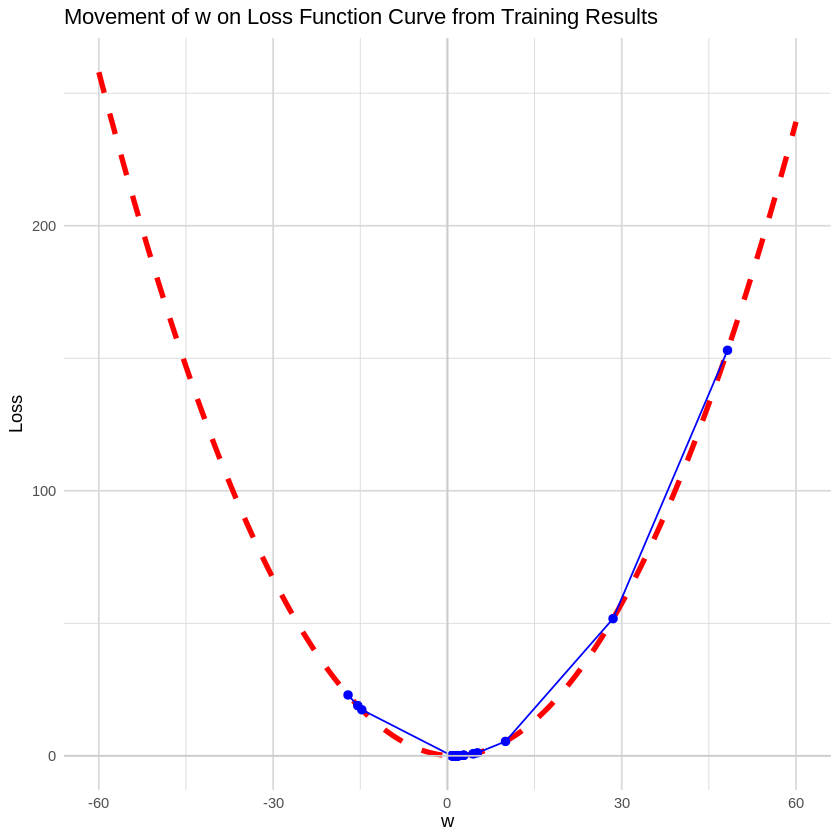

In [ ]:
# Required libraries
library(ggplot2)

# Assuming ws and loss_ws were previously calculated and w_his was generated from the training loop

# Create a data frame for the loss function curve
loss_data <- data.frame(w = ws, loss = loss_ws)

# Interpolate the loss values corresponding to the w_his values
w_his_loss <- approx(ws, loss_ws, w_his)$y

# Create a data frame for the training history
training_data <- data.frame(w = w_his, loss = w_his_loss)

# Plot the loss function curve and the training w values
ggplot() +
  geom_line(data = loss_data, aes(x = w, y = loss), color = 'red', linetype = 'dashed', size = 1.5) +
  geom_point(data = training_data, aes(x = w, y = loss), color = 'blue', size = 2) +
  geom_line(data = training_data, aes(x = w, y = loss), color = 'blue', linetype = 'solid', size = 0.5) +
  labs(title = 'Movement of w on Loss Function Curve from Training Results',
       x = expression(w), y = 'Loss') +
  xlim(-60, 60) +
  theme_minimal() +
  theme(panel.grid = element_line(color = "grey85")) +
  geom_vline(xintercept = 0, color = "grey80") +
  geom_hline(yintercept = 0, color = "grey80") +
  theme(legend.position = "bottom") +
  scale_color_manual(values = c("Loss Function" = "red", "Training w Values" = "blue"))


| Aspect                          | Stochastic Gradient Descent (SGD)                                   | Batch Gradient Descent (BGD)                                      |
|---------------------------------|---------------------------------------------------------------------|------------------------------------------------------------------|
| **Weight Update Frequency**     | After each training example                                        | After processing the entire dataset                               |
| **Data Utilized per Update**    | One data point at a time                                           | Entire dataset at once                                           |
| **Memory Requirements**         | Low (only one data point needed at a time)                         | High (requires entire dataset in memory)                         |
| **Computational Load per Update** | Low (computationally cheaper per update)                           | High (computationally expensive per update)                      |
| **Time Efficiency (Large Datasets)** | Generally more time-efficient due to faster iterations             | Less time-efficient due to high computational cost per iteration |
| **Convergence Path**            | Noisier, can oscillate around the minimum                          | Smoother, more direct path to the minimum                        |
| **Overall Time to Convergence** | Potentially longer due to more frequent but smaller updates        | Potentially shorter as each update is more comprehensive         |
| **Scalability**                 | Scales well with large datasets                                    | Limited scalability for very large datasets                      |
| **Suitability for Online Learning** | Well-suited for online/incremental learning scenarios             | Not suitable for online learning                                 |
| **Risk of Local Minima**        | Lower risk (frequent updates provide chances to escape local minima) | Higher risk (updates may converge to local minima)               |


# Exercise 2

**Manually calculate the gradients and new weights for the first three samples above!**

![](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Exercise.png)

## Why do we need DL fameworks such as Torch or TensorFlow?

In [1]:
# Installing needed packages for the project

install.packages(c(
  "keras3", "tensorflow", "fredr", "gridExtra", "rsample", "dplyr"
))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘RcppTOML’, ‘here’, ‘png’, ‘future’, ‘globals’, ‘warp’, ‘reticulate’, ‘tfruns’, ‘zeallot’, ‘config’, ‘tfautograph’, ‘furrr’, ‘slider’




In [2]:
library(rsample) # Load rsample library
library(scales)  # For rescaling functions
library(keras3)
library(tensorflow)
library(ggplot2)

# load dataset
data <- read.csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv')

data_scaled <- as.data.frame(lapply(data, rescale))

# Split the data into training and testing sets
splits <- initial_time_split(data_scaled, prop = 0.8)

data_scaled_train = training(splits)
data_scaled_test = testing(splits)

dim(data_scaled_train)
dim(data_scaled_test)


Attaching package: ‘tensorflow’


The following objects are masked from ‘package:keras3’:

    set_random_seed, shape




[1] 50  2

[1] 13  2

In [3]:
# Convert dataframe to matrix
matrix_data_train <- as.matrix(data_scaled_train)
matrix_data_test <- as.matrix(data_scaled_test)

In [4]:
# Define Hyperparameters
epochs <- 50
learning_rate <- 0.001
batch_size <- 32
d_hidden <- 64
d_out <- 1  # Adjust based on your task

# Prepare Data Dimensions
d_in <- ncol(matrix_data_train[,1])

In [5]:
# 1. Creating a Neural Network
# 1.1 Structure (Architecture) of NN
model <- keras_model_sequential() %>%
  layer_dense(
    units = d_hidden,
    activation = "relu",
    input_shape = c(1),
    name = "hidden_layer"
  ) %>%
  layer_dense(
    units = d_out,
    activation = "linear",
    name = "output_layer"
  )

# 1.2 Compile the Model (Loss Function and 1.3 Optimization Approach)
# Compile the Model with Custom Learning Rate
model %>% compile(
  optimizer = optimizer_adam(learning_rate = learning_rate),  # Use 'learning_rate' instead of 'lr'
  loss = "mean_squared_error",
  metrics = c("mean_absolute_error")
)

Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)              │ (None, 64)               │           128 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ output_layer (Dense)              │ (None, 1)                │            65 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 581 (2.27 KB)
 Trainable params: 193 (772.00 B)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 388 (1.52 KB)


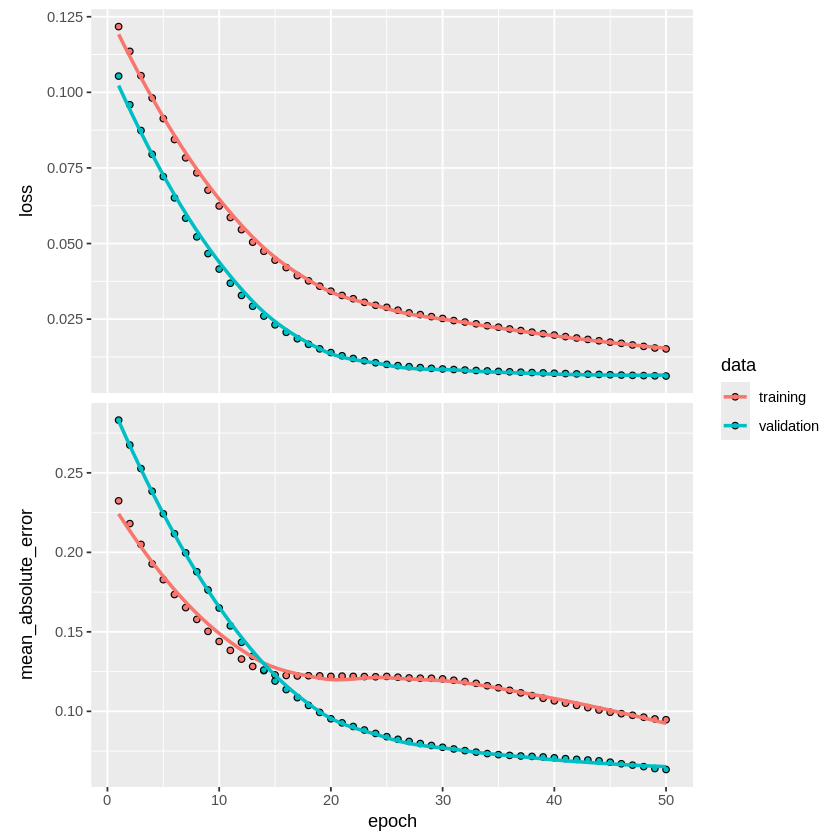

In [6]:
# Define Callbacks
callbacks_list <- list(
  callback_early_stopping(
    monitor = "val_loss",
    patience = 10,
    restore_best_weights = TRUE
  )
)

# 2. Fit the Model (Training Steps 2,3,4, and 5)
history <- model %>% fit(
  matrix_data_train[,1],
  matrix_data_train[,2],
  epochs = epochs,
  batch_size = batch_size,
  validation_split = 0.2,
  callbacks = callbacks_list
)

# View Model Summary
summary(model)

# Plot Training History
plot(history)


In [7]:
model %>% evaluate(matrix_data_test[,1],  matrix_data_test[,2], verbose = 2)

$loss
[1] 0.01624105

$mean_absolute_error
[1] 0.1083589

In [8]:
predictions <- predict(model, matrix_data_test[, 1])

In [9]:
model$get_weights()

[[1]]
          [,1]        [,2]      [,3]       [,4]       [,5]       [,6]      [,7]
[1,] 0.1477385 -0.06458658 0.2396527 -0.1426862 -0.2857239 -0.2908764 0.2533638
           [,8]       [,9]       [,10]       [,11]      [,12]     [,13]
[1,] -0.1167292 -0.2583017 -0.05905248 -0.01356575 0.07563063 -0.269774
         [,14]     [,15]       [,16]     [,17]        [,18]     [,19]     [,20]
[1,] 0.3662762 0.1428393 -0.07288413 0.3479333 -0.004015989 0.1631986 0.1052263
         [,21]     [,22]      [,23]      [,24]     [,25]     [,26]     [,27]
[1,] 0.2087017 0.1151736 -0.2934307 0.01814927 0.1270678 0.1195175 0.1715654
         [,28]     [,29]      [,30]      [,31]    [,32]       [,33]     [,34]
[1,] 0.2546887 0.1426594 -0.2228752 -0.2313778 0.216359 -0.03904957 0.3144369
          [,35]     [,36]     [,37]     [,38]      [,39]       [,40]     [,41]
[1,] -0.2835125 0.3151409 0.1003518 0.1408643 0.06758873 -0.01729724 0.3364963
          [,42]       [,43]      [,44]      [,45]     [,46]     [,47]
[1,] 0.08325392 -0.09554684 -0.2905757 0.09873133 -0.281789 0.2125306
           [,48]      [,49]      [,50]      [,51]    [,52]      [,53]     [,54]
[1,] -0.03751472 0.09646903 -0.2862553 -0.2611137 0.359928 -0.1735667 0.3461652
         [,55]      [,56]      [,57]      [,58]       [,59]       [,60]
[1,] 0.2724793 -0.1302984 -0.2645151 0.09312368 -0.09558487 -0.09749018
          [,61]      [,62]      [,63]     [,64]
[1,] -0.1934975 -0.2111246 -0.2327435 0.1121007

[[2]]
 [1] -0.053717785  0.000000000  0.025600564  0.000000000  0.000000000
 [6]  0.000000000 -0.041710187  0.000000000  0.000000000  0.000000000
[11]  0.000000000  0.025716258  0.000000000  0.017379802 -0.029938875
[16]  0.000000000  0.024516590 -0.006004986 -0.006535077 -0.045727644
[21] -0.053659990 -0.051214945  0.000000000 -0.026751695 -0.054403424
[26] -0.050355092 -0.053897548 -0.010980691 -0.052979082  0.000000000
[31]  0.000000000 -0.047346264  0.000000000  0.024517663  0.000000000
[36]  0.022937072 -0.044685870 -0.049992859  0.025875553  0.000000000
[41]  0.025835959  0.026080964  0.000000000  0.000000000  0.026034480
[46]  0.000000000 -0.051875181  0.000000000  0.026007177  0.000000000
[51]  0.000000000  0.025950262  0.000000000  0.025230052  0.025833219
[56]  0.000000000  0.000000000  0.025994424  0.000000000  0.000000000
[61]  0.000000000  0.000000000  0.000000000  0.025585178

[[3]]
             [,1]
 [1,] -0.14536078
 [2,]  0.27931488
 [3,]  0.19781379
 [4,] -0.20844345
 [5,]  0.29292291
 [6,]  0.05301428
 [7,] -0.00859724
 [8,]  0.01119453
 [9,] -0.08815743
[10,] -0.10444874
[11,]  0.10403985
[12,]  0.22117278
[13,]  0.17461365
[14,]  0.06081968
[15,]  0.01437414
[16,]  0.30355978
[17,]  0.11322670
[18,] -0.21108101
[19,]  0.03439416
[20,] -0.03117368
[21,] -0.22106373
[22,] -0.11193766
[23,] -0.25137079
[24,] -0.07188290
[25,] -0.24068369
[26,] -0.07280835
[27,] -0.15930054
[28,]  0.03522532
[29,] -0.11538040
[30,]  0.19678569
[31,] -0.22112155
[32,] -0.03933836
[33,] -0.07182707
[34,]  0.11347777
[35,]  0.01809508
[36,]  0.07912619
[37,] -0.02677481
[38,] -0.05571472
[39,]  0.25998741
[40,]  0.07806596
[41,]  0.24684192
[42,]  0.36122751
[43,] -0.24977013
[44,]  0.10547018
[45,]  0.33393416
[46,] -0.11625427
[47,] -0.11927567
[48,]  0.18611887
[49,]  0.31951544
[50,]  0.05756050
[51,] -0.22723326
[52,]  0.28497374
[53,]  0.08357015
[54,]  0.15292864
[55,]  0.24712251
[56,] -0.03590646
[57,] -0.11027540
[58,]  0.31318492
[59,]  0.14256483
[60,]  0.21087015
[61,]  0.14031768
[62,]  0.22895372
[63,]  0.16409758
[64,]  0.19911817

[[4]]
[1] 0.02655979

In [10]:
# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
model |> save_model("my_model.keras")

# It can be used to reconstruct the model identically.
reconstructed_model <- load_model("my_model.keras")

In [11]:
summary(model)

Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)              │ (None, 64)               │           128 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ output_layer (Dense)              │ (None, 1)                │            65 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 581 (2.27 KB)
 Trainable params: 193 (772.00 B)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 388 (1.52 KB)


In [12]:
summary(reconstructed_model)

Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)              │ (None, 64)               │           128 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ output_layer (Dense)              │ (None, 1)                │            65 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 581 (2.27 KB)
 Trainable params: 193 (772.00 B)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 388 (1.52 KB)


In [13]:
# Load the dplyr library
library(dplyr)
library(lubridate)
library(purrr) # This line is added to load the purrr library.

# Load the data
data <- read.csv("https://raw.githubusercontent.com/deepshamenghani/time-series-regression-tidymodels/refs/heads/main/data/timeseries_data_single_storeproduct.csv")

# 1. Preprocess the data
df <- data %>%
  mutate(
    date = as.Date(date, format = "%m/%d/%Y"),
    year = year(date),
    semester = factor(semester(date)),
    quarter = factor(quarter(date)),
    day_in_week = factor(wday(date), labels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")),
    week_in_year = factor(week(date)),
    day_in_year = factor(yday(date)),
    month = factor(month(date), levels = 1:12, labels = month.name)
  )

head(df)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘purrr’


The following object is masked from ‘package:scales’:

    discard




,date,sales,year,semester,quarter,day_in_week,week_in_year,day_in_year,month
,<date>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2010-01-01,801,2010,1,1,Friday,1,1,January
2,2010-01-02,810,2010,1,1,Saturday,1,2,January
3,2010-01-03,818,2010,1,1,Sunday,1,3,January
4,2010-01-04,796,2010,1,1,Monday,1,4,January
5,2010-01-05,808,2010,1,1,Tuesday,1,5,January
6,2010-01-06,812,2010,1,1,Wednesday,1,6,January


In [14]:
# Select only numeric columns
df_numeric <- df %>% select_if(is.numeric)

# Rescale numeric columns
df_scaled <- as.data.frame(lapply(df_numeric, rescale))

# Bind scaled numeric columns back with factor columns
df_scaled_final <- bind_cols(df_scaled, df %>% select_if(negate(is.numeric)))

head(df_scaled_final)

,sales,year,date,semester,quarter,day_in_week,week_in_year,day_in_year,month
,<dbl>,<dbl>,<date>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0.3085714,0,2010-01-01,1,1,Friday,1,1,January
2,0.3600000,0,2010-01-02,1,1,Saturday,1,2,January
3,0.4057143,0,2010-01-03,1,1,Sunday,1,3,January
4,0.2800000,0,2010-01-04,1,1,Monday,1,4,January
5,0.3485714,0,2010-01-05,1,1,Tuesday,1,5,January
6,0.3714286,0,2010-01-06,1,1,Wednesday,1,6,January


In [15]:
prepare_lstm_input <- function(df, n_timesteps) {
  # Ensure the input is a matrix
  df_matrix <- as.matrix(df)
  head(df_matrix)
  # Get dimensions of the matrix
  n_samples <- nrow(df_matrix) - n_timesteps
  n_features <- ncol(df_matrix)

  # Create empty lists to store X and y
  X_list <- list()
  y_list <- list()

  # Fill the lists with sequences and target values
  for (i in 1:n_samples) {
    X_list[[i]] <- df_matrix[i:(i + n_timesteps - 1), ]  # Sequence of n_timesteps
    y_list[[i]] <- df_matrix[i + n_timesteps, ]         # Next value as target
  }

  # Convert lists to arrays
  X <- array(do.call(rbind, X_list), dim = c(n_samples, n_timesteps, n_features))
  y <- matrix(unlist(y_list), nrow = n_samples, byrow = TRUE)

  return(list(X = X, y = y))
}

In [16]:
# 2. Split the data into training and testing sets
splits_train_test <- initial_time_split(df_scaled_final, prop = 0.8)
data_scaled_test = testing(splits_train_test)

splits_train_valid <- initial_time_split(training(splits_train_test), prop = 0.8)
data_scaled_train = training(splits_train_valid)
data_scaled_valid = testing(splits_train_valid)

dim(data_scaled_train)
dim(data_scaled_valid)
dim(data_scaled_test)

[1] 2336    9

[1] 585   9

[1] 731   9

In [18]:
head(data_scaled_train)

,sales,year,date,semester,quarter,day_in_week,week_in_year,day_in_year,month
,<dbl>,<dbl>,<date>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0.3085714,0,2010-01-01,1,1,Friday,1,1,January
2,0.3600000,0,2010-01-02,1,1,Saturday,1,2,January
3,0.4057143,0,2010-01-03,1,1,Sunday,1,3,January
4,0.2800000,0,2010-01-04,1,1,Monday,1,4,January
5,0.3485714,0,2010-01-05,1,1,Tuesday,1,5,January
6,0.3714286,0,2010-01-06,1,1,Wednesday,1,6,January


In [19]:
n_timesteps = 7

In [20]:
sequential_df_scaled_final_train <- prepare_lstm_input(data_scaled_train$sales, n_timesteps)
sequential_df_scaled_final_valid <- prepare_lstm_input(data_scaled_valid$sales, n_timesteps)
sequential_df_scaled_final_test <- prepare_lstm_input(data_scaled_test$sales, n_timesteps)

```r
model <- keras_model_sequential() %>%
  layer_lstm(units = 50, input_shape = c(n_timesteps, n_features)) %>%
  layer_dense(units = 1)
```

In [27]:
dim(sequential_df_scaled_final_train$X)
dim(sequential_df_scaled_final_train$y)

[1] 2329    7    1

[1] 2329    1

In [31]:
ncol(sequential_df_scaled_final_train$X)

[1] 7

In [28]:
n_timesteps = 7
n_features = 1

In [33]:
# Model

model = keras_model_sequential() %>%
  layer_lstm(units = 50, input_shape = c(n_timesteps, n_features), return_sequences = FALSE) %>%
  layer_dense(units = 1)

model %>% compile(
  loss = "mean_squared_error",
  optimizer = optimizer_adam(),
  metrics = c("mean_absolute_error")
)

summary(model)

Model: "sequential_2"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                       │ (None, 50)               │        10,400 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                     │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 10,451 (40.82 KB)
 Trainable params: 10,451 (40.82 KB)
 Non-trainable params: 0 (0.00 B)


Model: "sequential_2"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                       │ (None, 50)               │        10,400 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                     │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 31,355 (122.48 KB)
 Trainable params: 10,451 (40.82 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 20,904 (81.66 KB)
$loss
[1] 0.003773484

$mean_absolute_error
[1] 0.04887098



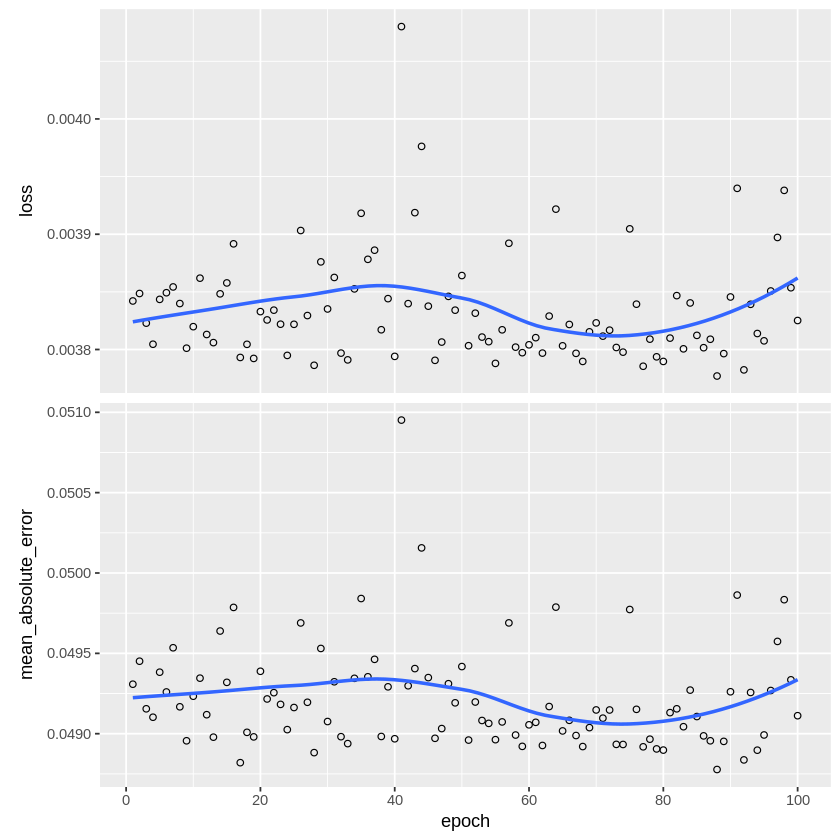

In [40]:
# Training, Evaluation & Results

history = model %>% fit(
  x = sequential_df_scaled_final_train$X,
  y = sequential_df_scaled_final_train$y,
  epochs = 100,
  batch_size = 64
)

# Evaluate the model
results = model %>% evaluate(
  x = sequential_df_scaled_final_train$X,
  y = sequential_df_scaled_final_train$y
)

# View Model Summary
summary(model)

# Plot Training History
plot(history)

print(results)

In [37]:
denormalize = function(x, min_x, max_x) {
  return (x * (max_x - min_x) + min_x)
}

# Denormalization for visualization

min_sale = min(df$sales, na.rm = TRUE)
max_sale = max(df$sales, na.rm = TRUE)

predictions = model %>% predict(sequential_df_scaled_final_train$X)

denormalized_predictions = denormalize(predictions, min_sale, max_sale)
denormalized_actuals = denormalize(sequential_df_scaled_final_train$y, min_sale, max_sale)

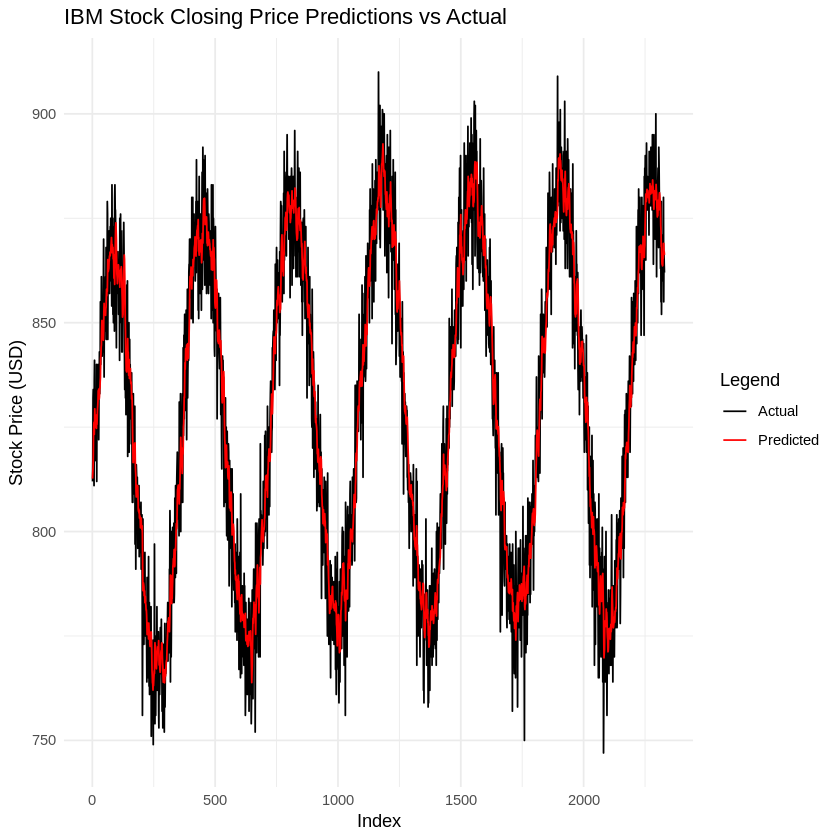

In [39]:
library(ggplot2)

# Visualization of the results of the model

plot_data = data.frame(
  Index = 1:length(denormalized_actuals),
  Actual = denormalized_actuals,
  Predicted = denormalized_predictions
)

ggplot(plot_data, aes(x = Index)) +
  geom_line(aes(y = Actual, color = "Actual")) +
  geom_line(aes(y = Predicted, color = "Predicted")) +
  labs(title = "IBM Stock Closing Price Predictions vs Actual",
       x = "Index",
       y = "Stock Price (USD)") +
  scale_color_manual(name = "Legend", values = c("Actual" = "Black", "Predicted" = "red")) +
  theme_minimal()

In [29]:
# 1. Creating a Neural Network
# 1.1 Structure (Architecture) of NN
model_2 <- keras_model_sequential() %>%
  layer_dense(
    units = d_hidden,
    activation = "relu",
    input_shape = c(n_timesteps, n_features),
    name = "hidden_layer"
  ) %>%
  layer_dense(
    units = d_out,
    activation = "linear",
    name = "output_layer"
  )

# 1.2 Compile the Model (Loss Function and 1.3 Optimization Approach)
# Compile the Model with Custom Learning Rate
model_2 %>% compile(
  optimizer = optimizer_adam(learning_rate = learning_rate),  # Use 'learning_rate' instead of 'lr'
  loss = "mean_squared_error",
  metrics = c("mean_absolute_error")
)

Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)              │ (None, 64)               │           128 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ output_layer (Dense)              │ (None, 1)                │            65 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 581 (2.27 KB)
 Trainable params: 193 (772.00 B)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 388 (1.52 KB)


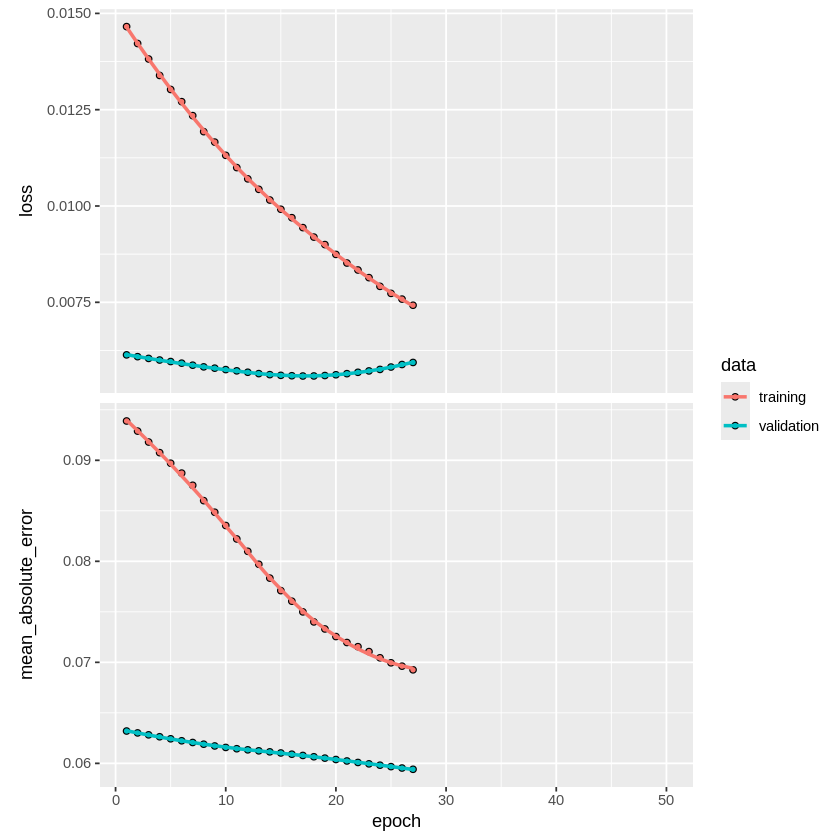

In [30]:
# Define Callbacks
callbacks_list <- list(
  callback_early_stopping(
    monitor = "val_loss",
    patience = 10,
    restore_best_weights = TRUE
  )
)

# 2. Fit the Model (Training Steps 2,3,4, and 5)
history <- model %>% fit(
  matrix_data_train[,1],
  matrix_data_train[,2],
  epochs = epochs,
  batch_size = batch_size,
  validation_split = 0.2,
  callbacks = callbacks_list
)

# View Model Summary
summary(model)

# Plot Training History
plot(history)

In [38]:
prepare_lstm_input <- function(df, n_timesteps) {
  # Ensure the input is a matrix
  df_matrix <- as.matrix(df)

  # Get dimensions of the matrix
  n_samples <- nrow(df_matrix) - n_timesteps
  n_features <- ncol(df_matrix)

  # Create empty lists to store X and y
  X_list <- list()
  y_list <- list()

  # Fill the lists with sequences and target values
  for (i in 1:n_samples) {
    X_list[[i]] <- df_matrix[i:(i + n_timesteps - 1), ]  # Sequence of n_timesteps
    y_list[[i]] <- df_matrix[i + n_timesteps, ]         # Next value as target
  }

  # Convert lists to arrays
  X <- array(unlist(X_list), dim = c(n_samples, n_timesteps, n_features))
  y <- do.call(rbind, y_list) # Combine rows from y_list

  return(list(X = X, y = y))
}

# Example usage
# Create a sample data frame with random data
df <- data.frame(
  feature1 = rnorm(100)
)

# Define the number of timesteps
n_timesteps <- 3

# Prepare the LSTM input
result <- prepare_lstm_input(df, n_timesteps)
X <- result$X
y <- result$y

# Print the shape of the resulting 3D array
dim(X)  # (samples, timesteps, features)
dim(y) # (samples, features)

# Check the first sample and its target
print(X[1, , ]) # First sample (n_timesteps values)
print(y[1, ])   # Target value for the first sample


[1] 97  3  1

[1] 97  1

[1]  1.7815973  0.2488094 -1.1006384
feature1 
0.029641 


1.78159735
0.19441668
-0.12996657
0.02964100
0.65020923
1.93562472

In [32]:
X[,1]

ERROR: Error in X[, 1]: incorrect number of dimensions


In [39]:
df

feature1
<dbl>
1.78159735
0.19441668
-0.12996657
0.02964100
0.65020923
1.93562472
-0.29369412
-0.37662116
1.93708863
